In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# import a CSV file into a Pandas DataFrame

filename = 'prem20_21.csv'
data = pd.read_csv(filename)
prem_21full = pd.DataFrame(data)
prem_21full.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [69]:
#Clean data to get relevant columns

prem_21_stats = prem_21full.loc[:, ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "Referee", "HS", "AS", "HY", "AY", "HR", "AR", "AvgH", "AvgD", "AvgA", "Avg>2.5", "Avg<2.5"]]
prem_21_stats.sort_values(by =["HomeTeam"])

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HY,AY,HR,AR,AvgH,AvgD,AvgA,Avg>2.5,Avg<2.5
313,18/04/2021,Arsenal,Fulham,1,1,D,C Pawson,18,3,0,3,0,0,1.75,3.72,4.91,2.04,1.79
244,21/02/2021,Arsenal,Man City,0,1,A,J Moss,7,15,2,2,0,0,6.27,4.36,1.53,1.76,2.08
293,03/04/2021,Arsenal,Liverpool,0,3,A,S Attwell,3,16,1,1,0,0,3.13,3.56,2.26,1.78,2.06
199,30/01/2021,Arsenal,Man United,0,0,D,M Oliver,17,14,1,3,0,0,2.86,3.40,2.51,1.82,2.01
55,25/10/2020,Arsenal,Leicester,0,1,A,C Pawson,12,6,3,5,0,0,1.93,3.74,3.92,1.74,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,25/10/2020,Wolves,Newcastle,1,1,D,L Mason,16,5,0,1,0,0,1.78,3.49,5.16,2.25,1.66
299,05/04/2021,Wolves,West Ham,2,3,A,M Oliver,20,9,1,4,0,0,2.95,3.13,2.58,2.40,1.58
312,17/04/2021,Wolves,Sheffield United,1,0,H,R Jones,10,8,1,2,0,0,1.69,3.55,5.81,2.33,1.61
206,02/02/2021,Wolves,Arsenal,2,1,H,C Pawson,11,9,3,2,0,2,3.63,3.29,2.17,2.27,1.64


In [70]:
#check for missing/null values 

prem_21_stats.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
Referee     0
HS          0
AS          0
HY          0
AY          0
HR          0
AR          0
AvgH        0
AvgD        0
AvgA        0
Avg>2.5     0
Avg<2.5     0
dtype: int64

In [179]:
# work out percentage chance of home and away win and over 2.5 goals

prem_21_stats["Home%Chance"] = (1 / prem_21_stats["AvgH"])*100
prem_21_stats["Away%Chance"] = (1 / prem_21_stats["AvgA"])*100
prem_21_stats["Over2.5%Chance"] = (1 / prem_21_stats["Avg>2.5"])*100
prem_21_stats["Total Goals"] = prem_21_stats["FTHG"] + prem_21_stats["FTAG"]
prem_21_stats

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HY,...,AR,AvgH,AvgD,AvgA,Avg>2.5,Avg<2.5,Home%Chance,Away%Chance,Over2.5%Chance,Total Goals
0,12/09/2020,Fulham,Arsenal,0,3,A,C Kavanagh,5,13,2,...,0,5.94,4.34,1.55,1.76,2.10,16.835017,64.516129,56.818182,3
1,12/09/2020,Crystal Palace,Southampton,1,0,H,J Moss,5,9,2,...,0,3.18,3.22,2.39,2.24,1.67,31.446541,41.841004,44.642857,1
2,12/09/2020,Liverpool,Leeds,4,3,H,M Oliver,22,6,1,...,0,1.30,5.96,9.68,1.52,2.53,76.923077,10.330579,65.789474,7
3,12/09/2020,West Ham,Newcastle,0,2,A,S Attwell,15,15,2,...,0,2.15,3.48,3.42,1.97,1.86,46.511628,29.239766,50.761421,2
4,13/09/2020,West Brom,Leicester,0,3,A,A Taylor,7,13,1,...,0,3.87,3.57,1.97,1.92,1.90,25.839793,50.761421,52.083333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,23/05/2021,Liverpool,Crystal Palace,2,0,H,C Pawson,19,5,2,...,0,1.16,8.28,17.35,1.37,3.10,86.206897,5.763689,72.992701,2
376,23/05/2021,Man City,Everton,5,0,H,M Oliver,21,8,2,...,0,1.44,4.94,6.83,1.62,2.31,69.444444,14.641288,61.728395,5
377,23/05/2021,Sheffield United,Burnley,1,0,H,K Friend,12,10,3,...,0,2.84,3.63,2.41,1.74,2.12,35.211268,41.493776,57.471264,1
378,23/05/2021,West Ham,Southampton,3,0,H,M Atkinson,14,17,0,...,0,1.72,4.00,4.76,1.63,2.31,58.139535,21.008403,61.349693,3


Text(0.5, 1.0, 'fig 1. 2021 Home Goals Histogram')

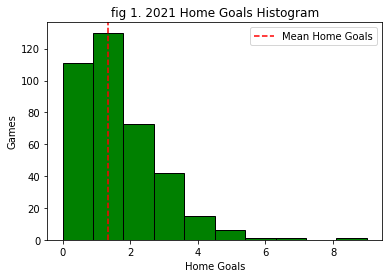

In [192]:
# Home goals histogram

FTHG = prem_21_stats["FTHG"]
mean_fthg = FTHG.mean()
plt.hist(FTHG, bins = 10, color = "green", edgecolor= "black")
plt.axvline(mean_fthg, color = "red", label = "Mean Home Goals", linestyle = "dashed")
plt.legend(loc= "upper right")
plt.ylabel("Games")
plt.xlabel("Home Goals")
plt.title("fig 1. 2021 Home Goals Histogram")

In [139]:
# find average number of home goals

mean_fthg

1.3526315789473684

Text(0.5, 1.0, 'fig 2. 2021 Away Goals Histogram')

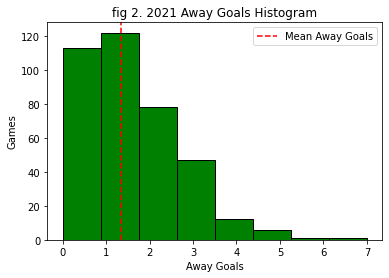

In [168]:
# Away goals histogram


FTAG = prem_21_stats["FTAG"]
mean_ftag = FTAG.mean()
plt.hist(FTAG, bins = 8, color = "green", edgecolor= "black")
plt.axvline(mean_fthg, color = "red", label = "Mean Away Goals", linestyle = "dashed")
plt.legend(loc= "upper right")
plt.ylabel("Games")
plt.xlabel("Away Goals")
plt.title("fig 2. 2021 Away Goals Histogram")

In [140]:
# find average number of away goals

mean_ftag

1.3421052631578947

In [101]:
#average home % chance
mean_home_chance = prem_21_stats["Home%Chance"].mean()
mean_home_chance


43.572804977889234

In [105]:
# expected home wins
exp_home_wins = (380 * mean_home_chance) / 100
exp_home_wins

165.5766589159791

In [198]:
#actual home wins using numpy array
home_wins = prem_21_stats[prem_21_stats["FTR"]=="H"]
np_home_wins = np.array(home_wins)
np_home_wins.shape

(144, 22)

In [201]:
np_home_wins

array([['12/09/2020', 'Crystal Palace', 'Southampton', ...,
        41.84100418410041, 44.64285714285714, 1],
       ['12/09/2020', 'Liverpool', 'Leeds', ..., 10.330578512396695,
        65.78947368421053, 7],
       ['19/09/2020', 'Everton', 'West Brom', ..., 15.873015873015872,
        55.24861878453039, 7],
       ...,
       ['23/05/2021', 'Man City', 'Everton', ..., 14.641288433382138,
        61.72839506172839, 5],
       ['23/05/2021', 'Sheffield United', 'Burnley', ...,
        41.49377593360995, 57.47126436781609, 1],
       ['23/05/2021', 'West Ham', 'Southampton', ..., 21.008403361344538,
        61.34969325153374, 3]], dtype=object)

In [102]:
#average away % chance
mean_away_chance = prem_21_stats["Away%Chance"].mean()
mean_away_chance


35.00429806045791

In [110]:
# expected away wins
exp_away_wins = (380 * mean_away_chance) / 100
exp_away_wins

133.01633262974008

In [200]:
#actual away wins using numpy array
away_wins = prem_21_stats[prem_21_stats["FTR"]=="A"]
np_away_wins = np.array(away_wins)
np_away_wins.shape

(153, 22)

In [182]:
# average chance of over 2.5 goals
mean_over_2_5_chance = prem_21_stats["Over2.5%Chance"].mean()
mean_over_2_5_chance


54.74734182247291

In [183]:
# expected over 2.5 goals
exp_over_2_5 = (380 * mean_over_2_5_chance) / 100
exp_over_2_5

208.03989892539707

In [202]:
# actual over 2.5 goals using numpy array
over_2_5 = prem_21_stats[prem_21_stats["Total Goals"] > 2.5]
np_over_2_5 = np.array(over_2_5)
np_over_2_5.shape


(190, 22)

In [193]:
# create dictionary with expected and actual wins and over 2.5 goals

results = {"Home xWins" : 165.5, "Home aWins" : 144, "Away xWins" : 133, "Away aWins" : 153, "xOver2.5" : 208, "aOver2.5" : 190}
results

{'Home xWins': 165.5,
 'Home aWins': 144,
 'Away xWins': 133,
 'Away aWins': 153,
 'xOver2.5': 208,
 'aOver2.5': 190}

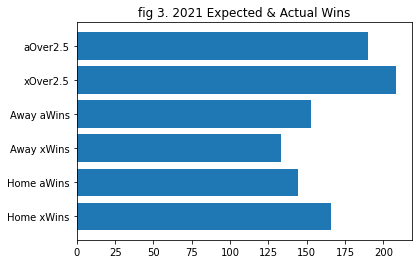

In [194]:
# Expected & Actual Wins

names = list(results.keys())
values = list(results.values())
plt.barh(range(len(results)), values, tick_label=names)
plt.title("fig 3. 2021 Expected & Actual Wins")
plt.show()


In [149]:
# getting referee stats

ref_21_stats = prem_21full.loc[:, ["Referee", "HY", "AY", "HR", "AR"]]
ref_21_stats

,Referee,HY,AY,HR,AR
0,C Kavanagh,2,2,0,0
1,J Moss,2,1,0,0
2,M Oliver,1,0,0,0
3,S Attwell,2,2,0,0
4,A Taylor,1,1,0,0
...,...,...,...,...,...
375,C Pawson,2,2,0,0
376,M Oliver,2,2,0,0
377,K Friend,3,1,0,0
378,M Atkinson,0,3,0,0


In [161]:
# total cards per match

ref_21_stats["Total Cards"] = ref_21_stats["HY"] + ref_21_stats["AY"] + ref_21_stats["HR"] + ref_21_stats["AR"]
ref_21_stats

,Referee,HY,AY,HR,AR,Total Cards
0,C Kavanagh,2,2,0,0,4
1,J Moss,2,1,0,0,3
2,M Oliver,1,0,0,0,1
3,S Attwell,2,2,0,0,4
4,A Taylor,1,1,0,0,2
...,...,...,...,...,...,...
375,C Pawson,2,2,0,0,4
376,M Oliver,2,2,0,0,4
377,K Friend,3,1,0,0,4
378,M Atkinson,0,3,0,0,3


In [162]:
# average cards per game

mean_cards = ref_21_stats["Total Cards"].mean()
mean_cards


2.9921052631578946

Text(0.5, 1.0, 'fig 4. 2021 Cards Per Game Histogram')

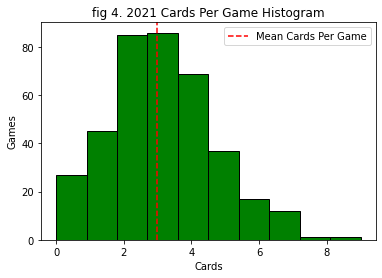

In [167]:
# cards per game histogram

CPG = ref_21_stats["Total Cards"]
mean_cpg = CPG.mean()
plt.hist(CPG, bins = 10, color = "green", edgecolor= "black")
plt.axvline(mean_cpg, color = "red", label = "Mean Cards Per Game", linestyle = "dashed")
plt.legend(loc= "upper right")
plt.ylabel("Games")
plt.xlabel("Cards")
plt.title("fig 4. 2021 Cards Per Game Histogram")

<function matplotlib.pyplot.show(close=None, block=None)>

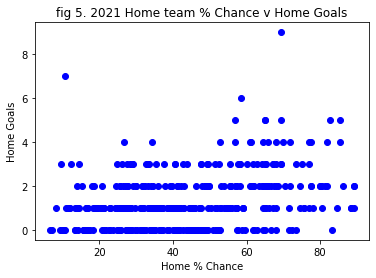

In [189]:
x = prem_21_stats["Home%Chance"]
y = prem_21_stats["FTHG"]

plt.scatter(x,y,c="Blue")
plt.ylabel("Home Goals")
plt.xlabel("Home % Chance")
plt.title("fig 5. 2021 Home team % Chance v Home Goals")
plt.show